In [ ]:
#The objective of this activity is to explore feature detection and description. This uses Brute-Force matcher with ORB
# For better understanding, please read: https://docs.opencv.org/3.4/dc/dc3/tutorial_py_matcher.html

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

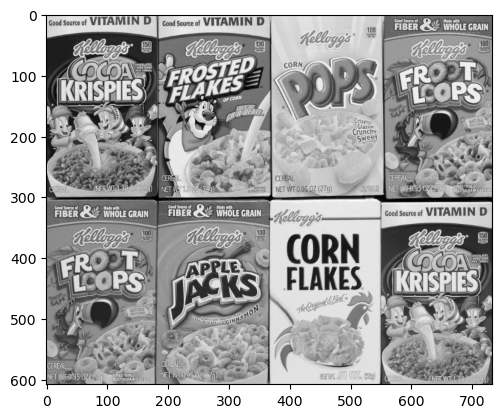

In [70]:
image1 = cv2.imread("cornpops.PNG",cv2.IMREAD_GRAYSCALE)
plt.imshow(image1,cmap="gray")

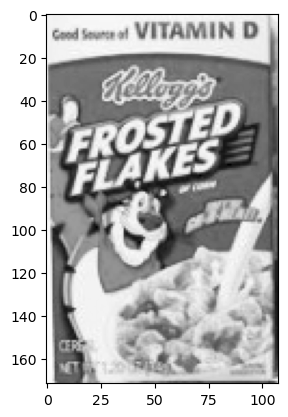

In [71]:
image2 = cv2.imread("cornpop.PNG",cv2.IMREAD_GRAYSCALE) # trainImage
plt.imshow(image2,cmap="gray")

In [72]:
# Initiate or create ORB detector
orb = cv2.ORB_create()

In [73]:
# find/detect and computer the keypoints with ORB. These two functions return keypoints and their descriptions
kp1, des1 = orb.detectAndCompute(image1,None)
kp2, des2 = orb.detectAndCompute(image2,None)

In [91]:
#500 keypoints found and computed in image1
len(kp1), len(des1)

(500, 500)

In [92]:
#256 keypoints found  and computed in image2
len(kp2), len(des2)

(236, 236)

In [93]:
des1

array([[ 51, 197, 101, ...,  86, 240, 124],
       [ 25, 219, 187, ..., 159,  40, 125],
       [253,  76, 117, ..., 233,  84, 100],
       ...,
       [217,  12,  91, ..., 160, 106,  18],
       [ 14,  31, 102, ...,  87, 249, 211],
       [ 15, 212,  53, ..., 118, 175, 119]], dtype=uint8)

In [94]:
des2

array([[135, 203,  29, ...,  35, 143, 149],
       [254, 207,  69, ..., 126, 220,  21],
       [  1,   4, 127, ..., 250, 241, 164],
       ...,
       [  6, 131,  48, ..., 136, 237, 133],
       [  5, 142, 144, ..., 197,   9,  13],
       [  2, 164, 149, ...,  76, 157, 174]], dtype=uint8)

In [74]:
# create BFMatcher object. This is a matching object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) # To understand the distance measurement with Hamming, read: https://docs.opencv.org/3.4/dc/dc3/tutorial_py_matcher.html

In [75]:
# Match descriptors.Is matching happening?
matches = bf.match(des1,des2)


In [80]:
matches

[< cv2.DMatch 0000018F7E4C8B70>,
 < cv2.DMatch 0000018F7E4C8C30>,
 < cv2.DMatch 0000018F7E4C8D50>,
 < cv2.DMatch 0000018F7E4C8CD0>,
 < cv2.DMatch 0000018F7E4C8E10>,
 < cv2.DMatch 0000018F7E4C8DB0>,
 < cv2.DMatch 0000018F7E4C8B90>,
 < cv2.DMatch 0000018F7E4C8ED0>,
 < cv2.DMatch 0000018F7E4C8BF0>,
 < cv2.DMatch 0000018F7E4C8D90>,
 < cv2.DMatch 0000018F7E4C8970>,
 < cv2.DMatch 0000018F7E4C8B30>,
 < cv2.DMatch 0000018F7E462E30>,
 < cv2.DMatch 0000018F7E4C8C70>,
 < cv2.DMatch 0000018F7E4C8AB0>,
 < cv2.DMatch 0000018F7E4C8FB0>,
 < cv2.DMatch 0000018F7E4C8C50>,
 < cv2.DMatch 0000018F7E4C88F0>,
 < cv2.DMatch 0000018F7E4C8930>,
 < cv2.DMatch 0000018F7E463550>,
 < cv2.DMatch 0000018F7E4C8610>,
 < cv2.DMatch 0000018F7E4C8490>,
 < cv2.DMatch 0000018F7E4C8310>,
 < cv2.DMatch 0000018F7E4C88B0>,
 < cv2.DMatch 0000018F7E4C8F30>,
 < cv2.DMatch 0000018F7E4636F0>,
 < cv2.DMatch 0000018F7E4C8B50>,
 < cv2.DMatch 0000018F7E463C30>,
 < cv2.DMatch 0000018F7E4C8430>,
 < cv2.DMatch 0000018F7E4C89D0>,
 < cv2.DMa

In [81]:
#The number of matches
len(matches)

111

In [83]:
one_match = matches[0]
one_match

< cv2.DMatch 0000018F7E4C8B70>

In [76]:
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance) # if you put a dot (.) on one-match for instance, you will se many attributes, including distance
#This sorts the matches based on distance and the closer the best match.

In [84]:
#There are 111 matches. We may opt to use less matches, 10 in our case
len(matches)

111

In [85]:
# Draw first 10 matches.You may want to increase the number of matches.
image3 = cv2.drawMatches(image1,kp1,image2,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

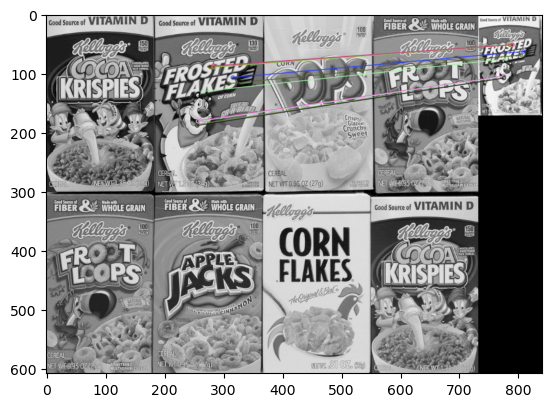

(<matplotlib.image.AxesImage at 0x18f7d1c8be0>, None)

In [78]:
plt.imshow(image3),plt.show()

In [79]:
#Please observe where the matching takes place with SIFT and ORB